# Productivity Tree Model

---

### Table of Contents<a id="toc"></a>

* [Intro](#intro)
    * [Set Up](#setup)
* [Initial Exploration](#init_explore)
    * [Column Definitions](#col_deff)
* [Deep Exploration](#deep_explore)
    * [Summary](#summary)
* [Data Cleaning](#data_cleaning)
    * [Distributions](#distributions)
    * [Outliers](#outliers)
    * [Correlations](#correlations)
* [Model Building](#building)
* [Model Metrics and Evaluation](#model_eval)
* [Decision Tree Flow Diagram](#diagram)
* [Final Evaluation](#final_eval)
* [Conclusion](#conclusion)

---

### Intro<a id="intro"></a>

Clothing plays a large role in the economy of today's world. As of 2025, it accounts for approximately **1.65%** of the world's total manufacturing output and about **11.9%** of the global workforce. While these may seem like small percentages, on a worldwide scale, they are quite significant. The global apparel market is valued at around **\\$1.84 trillion** in 2025, while the U.S. apparel market alone is valued at **\$365.70 billion**. With a market of such considerable size, the productivity of garment employees is of the utmost importance to both market leaders and customers demanding the product.

In this project, we will construct a supervised machine learning model, specifically a classification decision tree, to predict the productivity of garment employee teams. We will use a dataset created by Abdullah Al Imran, Md Shamsur Rahim, and Tanvir Ahmed in **2021**. It can be downloaded [here](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees).

Our goal for this project is to demonstrate our skills in data cleaning and preparation, as well as in decision tree machine learning. We aim to build a model that can predict whether a garment employee team will meet their productivity target value, based on job-related variables. Using different parameters, along with various tools, we will strive to build a model with the highest accuracy possible.

### Set Up<a id="setup"></a>

Let's start setting up our project by importing our necessary libraries and reading our dataset.

In [1]:
# Importing our libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
# Reading in our data
df = pd.read_csv("garments_worker_productivity.csv")

### Initial Exploration<a id="init_explore"></a>

With our project now prepared and ready, we can move into the initial exploration stage. This step provides us with an idea of the data we’re working with and helps us start our list of items we’ll need to clean up later.

In [3]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


**`df` – Observations:**

* Some column names appear to be shorthand for longer terms, so we need to confirm their full meanings.
* There are **1,197** rows and **15** columns.
* The date column indicates that our data spans a period of approximately **two and a half months**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

**`df.info()` – Observations:**

* There are **4** object columns, **5** integer columns, and **6** float columns.
* The **`wip`** column is the only one with missing or null values.

In [5]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


**`df.describe()` – Observations:**

* The **`no_of_style_change`** column is possibly categorical.
* There do not appear to be any binary columns.

In [6]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

**Dataset Column Definitions<a id="col_deff"></a> (from the [Official Page](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees)):**

* **`date`** – Date in **MM-DD-YYYY** format.
* **`day`** – Day of the week.
* **`quarter`** – A portion of the month; a month is divided into four quarters.
* **`department`** – The department associated with the instance.
* **`team_no`** – The team number associated with the instance.
* **`no_of_workers`** – Number of workers in each team.
* **`no_of_style_change`** – Number of changes in the style of a particular product.
* **`targeted_productivity`** – Targeted productivity set by the authority for each team on each day.
* **`smv`** – Standard Minute Value, which is the allocated time for a task.
* **`wip`** – Work in progress; includes the number of unfinished items for products.
* **`over_time`** – Represents the amount of overtime by each team, measured in minutes.
* **`incentive`** – Represents the amount of financial incentive (in BDT) that motivates a particular course of action.
* **`idle_time`** – The amount of time when production was interrupted due to various reasons.
* **`idle_men`** – The number of workers who were idle due to production interruptions.
* **`actual_productivity`** – The actual percentage of productivity delivered by the workers, ranging from **0 to 1**.

[Back to Table of Contents](#toc)

### Deep Exploration<a id="deep_explore"></a>

In the previous initial exploration step, you may have noticed that our list of observations was quite small. However, there's no need to worry as we move into the next step. Regardless of the number of initial observations we have, they can often be misleading. That’s why we will closely examine each column in this section to identify any hidden imperfections. As we go through each one, we will start forming a list of cleaning tasks, which we will later execute in the data cleaning section.

Let’s start with the first column, **`date`**. In the code below, we will examine the different unique values in the **`date`** column and how many times each one occurs.

In [7]:
df["date"].value_counts()

date
1/31/2015    24
3/11/2015    24
1/11/2015    23
1/24/2015    23
1/12/2015    23
3/10/2015    23
1/8/2015     22
1/13/2015    22
1/22/2015    22
1/10/2015    22
1/7/2015     22
3/9/2015     22
3/3/2015     22
1/5/2015     22
3/8/2015     22
1/25/2015    21
1/6/2015     21
1/4/2015     21
2/26/2015    21
2/28/2015    21
2/25/2015    21
2/18/2015    21
1/14/2015    21
1/17/2015    21
1/27/2015    21
1/28/2015    21
1/3/2015     21
3/4/2015     21
1/29/2015    20
2/19/2015    20
2/17/2015    20
3/1/2015     20
3/2/2015     20
2/22/2015    20
1/1/2015     19
2/7/2015     19
2/1/2015     19
1/21/2015    19
1/26/2015    19
1/18/2015    19
1/19/2015    19
1/15/2015    19
2/2/2015     19
2/23/2015    19
2/4/2015     19
2/3/2015     19
2/10/2015    19
2/11/2015    19
2/8/2015     19
2/15/2015    19
2/12/2015    19
3/7/2015     19
2/24/2015    19
3/5/2015     19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: count, dtype: int64

In observing the above results, we can see that the dates in our dataset range between **January**, **February**, and **March** of **2015**. One noticeable aspect of these months is that there are no major holidays, such as **Christmas**, **July 4th**, **Thanksgiving**, or **Easter**. If our data had covered months with large holidays, we would need to consider whether the holidays affected productivity. However, in this case, we do not need to account for holidays during these months. 

One final observation is that the column is listed as an **integer** data type. This should be changed later to a **datetime** type.

In the code below, we will begin our list of notes and tasks to revisit once we start cleaning the data. As we examine each column, we will want to remember the things we noticed or any problems that need to be addressed. To ensure none of these are forgotten, we will add them to our data cleaning list.

In [8]:
concerns = []
concerns.append('Convert to a datetime type')

Our next column of interest is the **`quarter`** column. As we did with the **`date`** column, we will examine the unique values and their counts.

In [9]:
df["quarter"].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

Recall from the column definitions earlier that the quarters in this column do **not** represent parts of the year, but rather sections of a single month. Even with this in mind, we are already questioning why there are **5** quarters instead of **4**, since a general month can be split into **4** sections quite easily. We also notice that there are very few occurrences of **"Quarter5"** values compared to the others. It might be best to change the **"Quarter5"** values to **"Quarter4,"** which will help us better understand productivity at different parts of each month. Lastly, we will also want to remove the **'Quarter'** prefix from each value for model preparation purposes later (e.g., **'Quarter3'** will be changed to **'3'**).

In [10]:
concerns.append("Change all occurences of 'Quarter5' to 'Quarter4'; remove 'Quarter' from each value")

Next, let’s examine the **`department`** column.

In [11]:
df["department"].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

The first thing we notice about the result above is that there are two matching unique **"finishing"** values. This likely indicates that some of the **"finishing"** values have an incorrect extra space. To clean up this column, we will need to remove all extra spaces from the values. Additionally, we notice a spelling error in the first unique value; **"sweing"** should be corrected to **"sewing."** We can implement these changes during the data cleaning process later on.

In [12]:
concerns.append("Remove all extra spaces from column values; correct 'sweing' value spelling typo")

Our next column is the **`day`** column.

In [13]:
df["day"].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

In this column, we can see that it contains the day of the week that each row or instance occurred on. However, we also notice that **Friday** is not in the list. This may be because the factory is closed on that day. As for what this column needs, there don’t appear to be any errors visible here, but it might be interesting to examine how productivity varies on different days of the week.

In [14]:
concerns.append("Examine how much productivity varies on different days of the week")

Up to this point, all the columns we have been examining have had object data types, meaning their values were either text or non-numeric. The next column, the **`team`** column, is a numeric or integer column, meaning its values are numbers. While we will still look at the unique value count, as we did before, we can also examine other metrics, such as the average. However, if we recall the definition for this column, it states that the numbers in this column are simply labels for different teams. This means that if we were to examine the column through metrics like the average, the average value would not have any meaningful interpretation. 

Numeric metrics, such as the average, will certainly be useful when we examine the upcoming integer and float data type columns, but for the **`team`** column, we will simply look at the unique value counts as we have before.

In [15]:
df["team"].value_counts()

team
8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64

Above, we can see the number of times each team had an instance or row in the dataset. However, since these values are team labels and do not hold any numerical significance, the data type should be changed to a **string** type. We will also examine the productivity of each team later on. As we do not see any other errors, we will add our notes for this column to our summary list.

In [16]:
concerns.append("Change to a string type; examine how much productivity varies between teams")

Following the **`team`** column, we have the **`targeted_productivity`** column. Let’s examine its unique value counts along with some additional numeric metrics in the code below.

In [17]:
print(df["targeted_productivity"].value_counts())
print("\n")
print(df["targeted_productivity"].describe())

targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64


count    1197.000000
mean        0.729632
std         0.097891
min         0.070000
25%         0.700000
50%         0.750000
75%         0.800000
max         0.800000
Name: targeted_productivity, dtype: float64


Above, we can see that the values in the **`targeted_productivity`** column range from **0.07** to **0.80**, averaging around **0.73**. Most of the values also seem to be **0.70** or above. However, we notice that the **0.07** value appears extremely low compared to all the other values. It is likely a typo or an outlier and can be removed. Aside from these observations, there doesn’t seem to be anything else out of order in this column.

In [18]:
concerns.append("Remove low outlier value")

The next column up for examination is the **`smv`** column. To refresh our memories, this column is defined as "Standard Minute Value; it is the allocated time for a task." We will examine it in the code below.

In [19]:
print(df["smv"].value_counts())
print("\n")
print(df["smv"].describe())

smv
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
38.09      1
48.18      1
30.40      1
50.89      1
20.20      1
Name: count, Length: 70, dtype: int64


count    1197.000000
mean       15.062172
std        10.943219
min         2.900000
25%         3.940000
50%        15.260000
75%        24.260000
max        54.560000
Name: smv, dtype: float64


The above result is a great example of why the other metric tools are especially helpful with integer columns. This column has **70** unique values, making it challenging to identify patterns or errors. However, because we are using the **`.describe()`** function to view our other metrics, we can examine the smaller details of the column at a glance. In the **`smv`** column, we can see that its values range from **2.9** to **54.56**, which is quite a large range. Its average is **15.06**. Not seeing any obvious errors, we will want to explore the correlation between the time allocated for a task and the productivity of that instance.

In [20]:
concerns.append("Examine the correlation between smv and productivity")

Following the **`smv`** column, we have another column with an abbreviated name, **`wip`**. If we [look back](#col_deff) at our column definitions, we can see that **"wip"** stands for **Work In Progress**. Let’s examine it in the code below.

In [21]:
print(df["wip"].value_counts())
print("\n")
print(df["wip"].describe())

wip
1039.0    5
1282.0    4
1079.0    3
1193.0    3
1069.0    3
         ..
357.0     1
817.0     1
1576.0    1
1262.0    1
953.0     1
Name: count, Length: 548, dtype: int64


count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64


Right away, we notice several differences about this column compared to the others we've seen so far. The first observation is that the number of values in this column (as indicated by the **'count'** metric) is extremely low. This suggests that the column likely has many empty values, which we must note for data cleaning later. 

We also observe that the values themselves and the range of values are much larger than in any column we've previously examined. The values range from **7** to **23,122**, containing **548** unique values, with an average of **1,190**. However, the size and range of the values are not problematic; they simply indicate how many items are still being worked on or are unfinished. Aside from these observations, we don't see any other errors in the column or data. We will take note of the missing data issue and later examine the effects of this column on overall productivity.

In [22]:
concerns.append("Much missing data; examine the effects of this column on the overall productivity")

Our next column to examine is the **`over_time`** column. This column describes the amount of time each team works extra, measured in minutes.

In [23]:
print(df["over_time"].value_counts())
print("\n")
print(df["over_time"].describe())

over_time
960     129
1440    111
6960     61
6840     48
1200     39
       ... 
5700      1
1680      1
1700      1
4680      1
3120      1
Name: count, Length: 143, dtype: int64


count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64


In the results above, we can see that the number of unique values is not as high as in the **`wip`** column. On the other hand, the range of those unique values is larger, reaching from **0** to **25,920**. We also notice that there aren't very many small values, with most of the values being **1,440** or above. This indicates that a significant amount of overtime work is being accomplished. Not seeing any indications of errors, we look forward to examining how the factor of overtime labor affects productivity.

In [24]:
concerns.append("Examine how productivity is effected by the variable of overtime labor")

Next up is the **`incentive`** column. This column contains the amounts of financial incentive provided to meet a certain goal, such as targeted productivity or a specific amount of overtime labor. The column definition does not specify the exact goal to be met in order to receive the incentive. However, we know that, whatever the incentive is aimed at, its ultimate goal would most likely be higher productivity. Let’s examine the **`incentive`** column in the code below.

In [25]:
print(df["incentive"].value_counts())
print("\n")
print(df["incentive"].describe())

incentive
0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
55        7
81        7
100       7
65        6
69        6
70        6
960       5
35        5
44        4
94        4
90        3
49        2
27        2
46        2
119       2
24        2
98        1
29        1
54        1
37        1
21        1
138       1
33        1
53        1
93        1
62        1
32        1
1080      1
2880      1
3600      1
1440      1
1200      1
25        1
Name: count, dtype: int64


count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64


We can quickly see from the above results that less than half of the employees receive incentives. It doesn’t matter that the values range from **0** to **3,600** when most of the values are **0**. We will want to examine the distribution of this column later.

In [26]:
concerns.append("Examine column distribution")

For our next examination, we will look at two columns simultaneously. The **`idle_time`** column is defined as "the amount of time when production was interrupted due to various reasons." The **`idle_men`** column is defined as "the number of workers who were idle due to production interruptions." Since they are so similar in content, we will examine them together.

In [27]:
print(df["idle_time"].value_counts())
print("\n")
print(df["idle_men"].value_counts())
print("\n")
print(df[["idle_time", "idle_men"]].describe())

idle_time
0.0      1179
3.5         3
2.0         2
8.0         2
4.0         2
4.5         2
5.0         2
90.0        1
270.0       1
150.0       1
300.0       1
6.5         1
Name: count, dtype: int64


idle_men
0     1179
10       3
15       3
30       3
20       3
35       2
37       1
45       1
25       1
40       1
Name: count, dtype: int64


         idle_time     idle_men
count  1197.000000  1197.000000
mean      0.730159     0.369256
std      12.709757     3.268987
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       0.000000     0.000000
max     300.000000    45.000000


As we expected, the two columns are very similar in composition, both having the exact same number of **'0'** values, which make up the majority of the entries. This indicates that there was not much time when the factory or the workers were idle or not engaged in any activity. At this moment, we do not see any obvious errors, but we will want to examine the **18** rows from these columns that are not **0** to determine if they hold any special significance. We will also examine the distributions of these two columns.

In [28]:
# Repeated, one explaination for each column
concerns.append("Examine the non-zero values and column distribution")
concerns.append("Examine the non-zero values and column distribution")

Our next column for examination is the **`no_of_style_change`** column. Its definition is labeled as the "number of changes in the style of a particular product."

In [29]:
print(df["no_of_style_change"].value_counts())
print("\n")
print(df["no_of_style_change"].describe())

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64


count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64


With only three unique values, the **`no_of_style_change`** column ranges from **0** to **2**. Furthermore, the majority of the values are **0**, with only **147** non-zero values. This suggests that there aren’t very many product style changes. With no noticeable errors present, we will later examine whether there is any significant correlation between the number of style changes and productivity amounts.

In [30]:
concerns.append("Check for any significant correlation between the number of style changes and productivity")

Next up is the **`no_of_workers`** column. Its title indicates that the column will contain amounts of workers. The values refer to the total number of workers in each team, as we can recall from earlier in our [column definitions](#col_deff). Let’s explore this column in the code below.

In [31]:
print(df["no_of_workers"].value_counts())
print("\n")
print(df["no_of_workers"].describe())

no_of_workers
8.0     262
58.0    114
57.0    109
59.0     75
10.0     60
       ... 
26.0      1
47.0      1
48.0      1
24.0      1
6.0       1
Name: count, Length: 61, dtype: int64


count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64


In considering the results above, we notice that there are **61** unique values. At first, this may seem a bit surprising, since there are only **12** teams, and this column counts the number of workers in each team. While this may seem odd initially, it makes more sense when we consider that the number of workers might vary each day due to reasons such as time off or part-time positions. 

We also observe that the column has a maximum value of **89** and a minimum value of **2**, indicating that sometimes teams might have **89** workers while others have only **2**! However, the average is **34**, and most of the values seem to fall between **9** and **57**. Lastly, we can see that the data type for this column is a **float** type, meaning that it is possible the column contains fractional numbers such as **3.5**. This would be ridiculous, as a team cannot have half a worker. Later, in our data cleaning segment, we will need to round up any fractional numbers and convert the column to an **integer** data type. Not seeing any more errors, it will be intriguing to find out if a team's size makes a difference in that team's productivity.

In [32]:
concerns.append("Study correlation between team size and productivity; round values, and convert column to interger data type")

We have finally reached the examination of our last column! The **`actual_productivity`** column's definition is straightforward, simply containing the values of productivity that were genuinely accomplished by each team. We will examine it in the code below.

In [33]:
print(df["actual_productivity"].value_counts())
print("\n")
print(df["actual_productivity"].describe())

actual_productivity
0.800402    24
0.850137    12
0.971867    12
0.850502    11
0.750651    11
            ..
0.894444     1
0.900061     1
0.909392     1
0.920000     1
0.521180     1
Name: count, Length: 879, dtype: int64


count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64


One of the first things we notice in the results above is the large number of unique values. However, this is not altogether surprising, as team productivity relies on many factors. A small change in a day or section of time can completely alter the productivity values. We can see that the values range from **0.233705** to **1.120437**, with an average of **0.735091**. We also observe that most of the values seem to fall between **0.6** and **0.85**. Seeing no errors, we will note the obvious course of action: to examine the correlations between this column and every other column in the dataset.

In [34]:
concerns.append("Examine the correlations between this column and every other column")

<a id="summary"></a>
As we have examined each column, we have added its needs or our notes from that column to a list. Let’s now review what we’ve gathered to remind us of the tasks we will need to accomplish in the upcoming data cleaning segments. We will complete and visualize our summary in the code below.

In [35]:
column_names = df.columns.tolist()
print(column_names)

['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']


In [36]:
# Compiling our column names and notes
data = {
    'Column': column_names,
    'Concerns/Notes': concerns
}
cleaning = pd.DataFrame(data)

# Visualizing our summary
markdown_string = "| Column  | Concerns/Notes |\n|--------|-------|\n"
for index, row in cleaning.iterrows():
    markdown_string += f"| {row['Column']} | {row['Concerns/Notes']} |\n"

display(Markdown(markdown_string))

| Column  | Concerns/Notes |
|--------|-------|
| date | Convert to a datetime type |
| quarter | Change all occurences of 'Quarter5' to 'Quarter4'; remove 'Quarter' from each value |
| department | Remove all extra spaces from column values; correct 'sweing' value spelling typo |
| day | Examine how much productivity varies on different days of the week |
| team | Change to a string type; examine how much productivity varies between teams |
| targeted_productivity | Remove low outlier value |
| smv | Examine the correlation between smv and productivity |
| wip | Much missing data; examine the effects of this column on the overall productivity |
| over_time | Examine how productivity is effected by the variable of overtime labor |
| incentive | Examine column distribution |
| idle_time | Examine the non-zero values and column distribution |
| idle_men | Examine the non-zero values and column distribution |
| no_of_style_change | Check for any significant correlation between the number of style changes and productivity |
| no_of_workers | Study correlation between team size and productivity; round values, and convert column to interger data type |
| actual_productivity | Examine the correlations between this column and every other column |


[Back to Table of Contents](#toc)

### Data Cleaning<a id="data_cleaning"></a>

In this section, we will tackle the following problems:

* Convert the **`date`** column to a **datetime** data type.
* Convert the **`team`** column to a **string** data type.
* Round the values in the **`no_of_workers`** column and convert it to an **integer** data type.
* Change all occurrences of **'Quarter5'** to **'Quarter4'** and remove **'Quarter'** from each value in the **`quarter`** column.
* Remove all extra spaces from column values and correct the **'sweing'** spelling typo in the **`department`** column.
* Remove the low outlier value in the **`targeted_productivity`** column.

Let's take care of the data type issues first in the code below.

In [37]:
# Create a copy of the original dataframe; we will apply all our cleaning to the new dataframe
df_clean = df.copy()

In [38]:
# Convert the 'date' to datetime type
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%m/%d/%Y')

# Convert the 'team' to string type
df_clean['team'] = df_clean['team'].astype(str)

# Round up the 'no_of_workers' values and convert to integer type
df_clean['no_of_workers'] = np.ceil(df_clean['no_of_workers']).astype(int)

Next, let's tackle the last three tasks from our cleaning list in the code below.

In [39]:
# Change all occurences of 'Quarter5' to 'Quarter4' in the quarter column
df_clean['quarter'] = df_clean['quarter'].replace(to_replace='Quarter5', value='Quarter4', regex=True)

# Remove 'Quarter' from each value in the quarter column
df_clean['quarter'] = df_clean['quarter'].str.replace('Quarter', '', regex=False)

df_clean['quarter'].value_counts()

quarter
1    360
2    335
4    292
3    210
Name: count, dtype: int64

In [40]:
# Strip extra spaces and correct spelling mistake
df_clean['department'] = df_clean['department'].str.strip().replace(to_replace='sweing', value='sewing')

df_clean['department'].value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

In [41]:
# Remove the low outlier value in the targeted_productivity column
outlier_value = 0.07

df_clean = df_clean[df_clean['targeted_productivity'] != outlier_value]

df_clean['targeted_productivity'].value_counts()

targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
Name: count, dtype: int64

In [42]:
df_clean

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,2015-01-01,1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8,0.886500
2,2015-01-01,1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,31,0.800570
3,2015-01-01,1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,31,0.800570
4,2015-01-01,1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8,0.628333
1193,2015-03-11,2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8,0.625625
1194,2015-03-11,2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8,0.625625
1195,2015-03-11,2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15,0.505889


[Back to Table of Contents](#toc)

#### Distributions<a id="distributions"></a>

With our major cleaning tasks completed, we can now delve into the smaller details in this next segment. By examining aspects like correlations and distributions, we can determine which columns are truly necessary or beneficial to our dataset and model, and which columns are simply taking up space or providing no value. We will examine the distributions of all columns, except for the **`date`** column, in the code below.

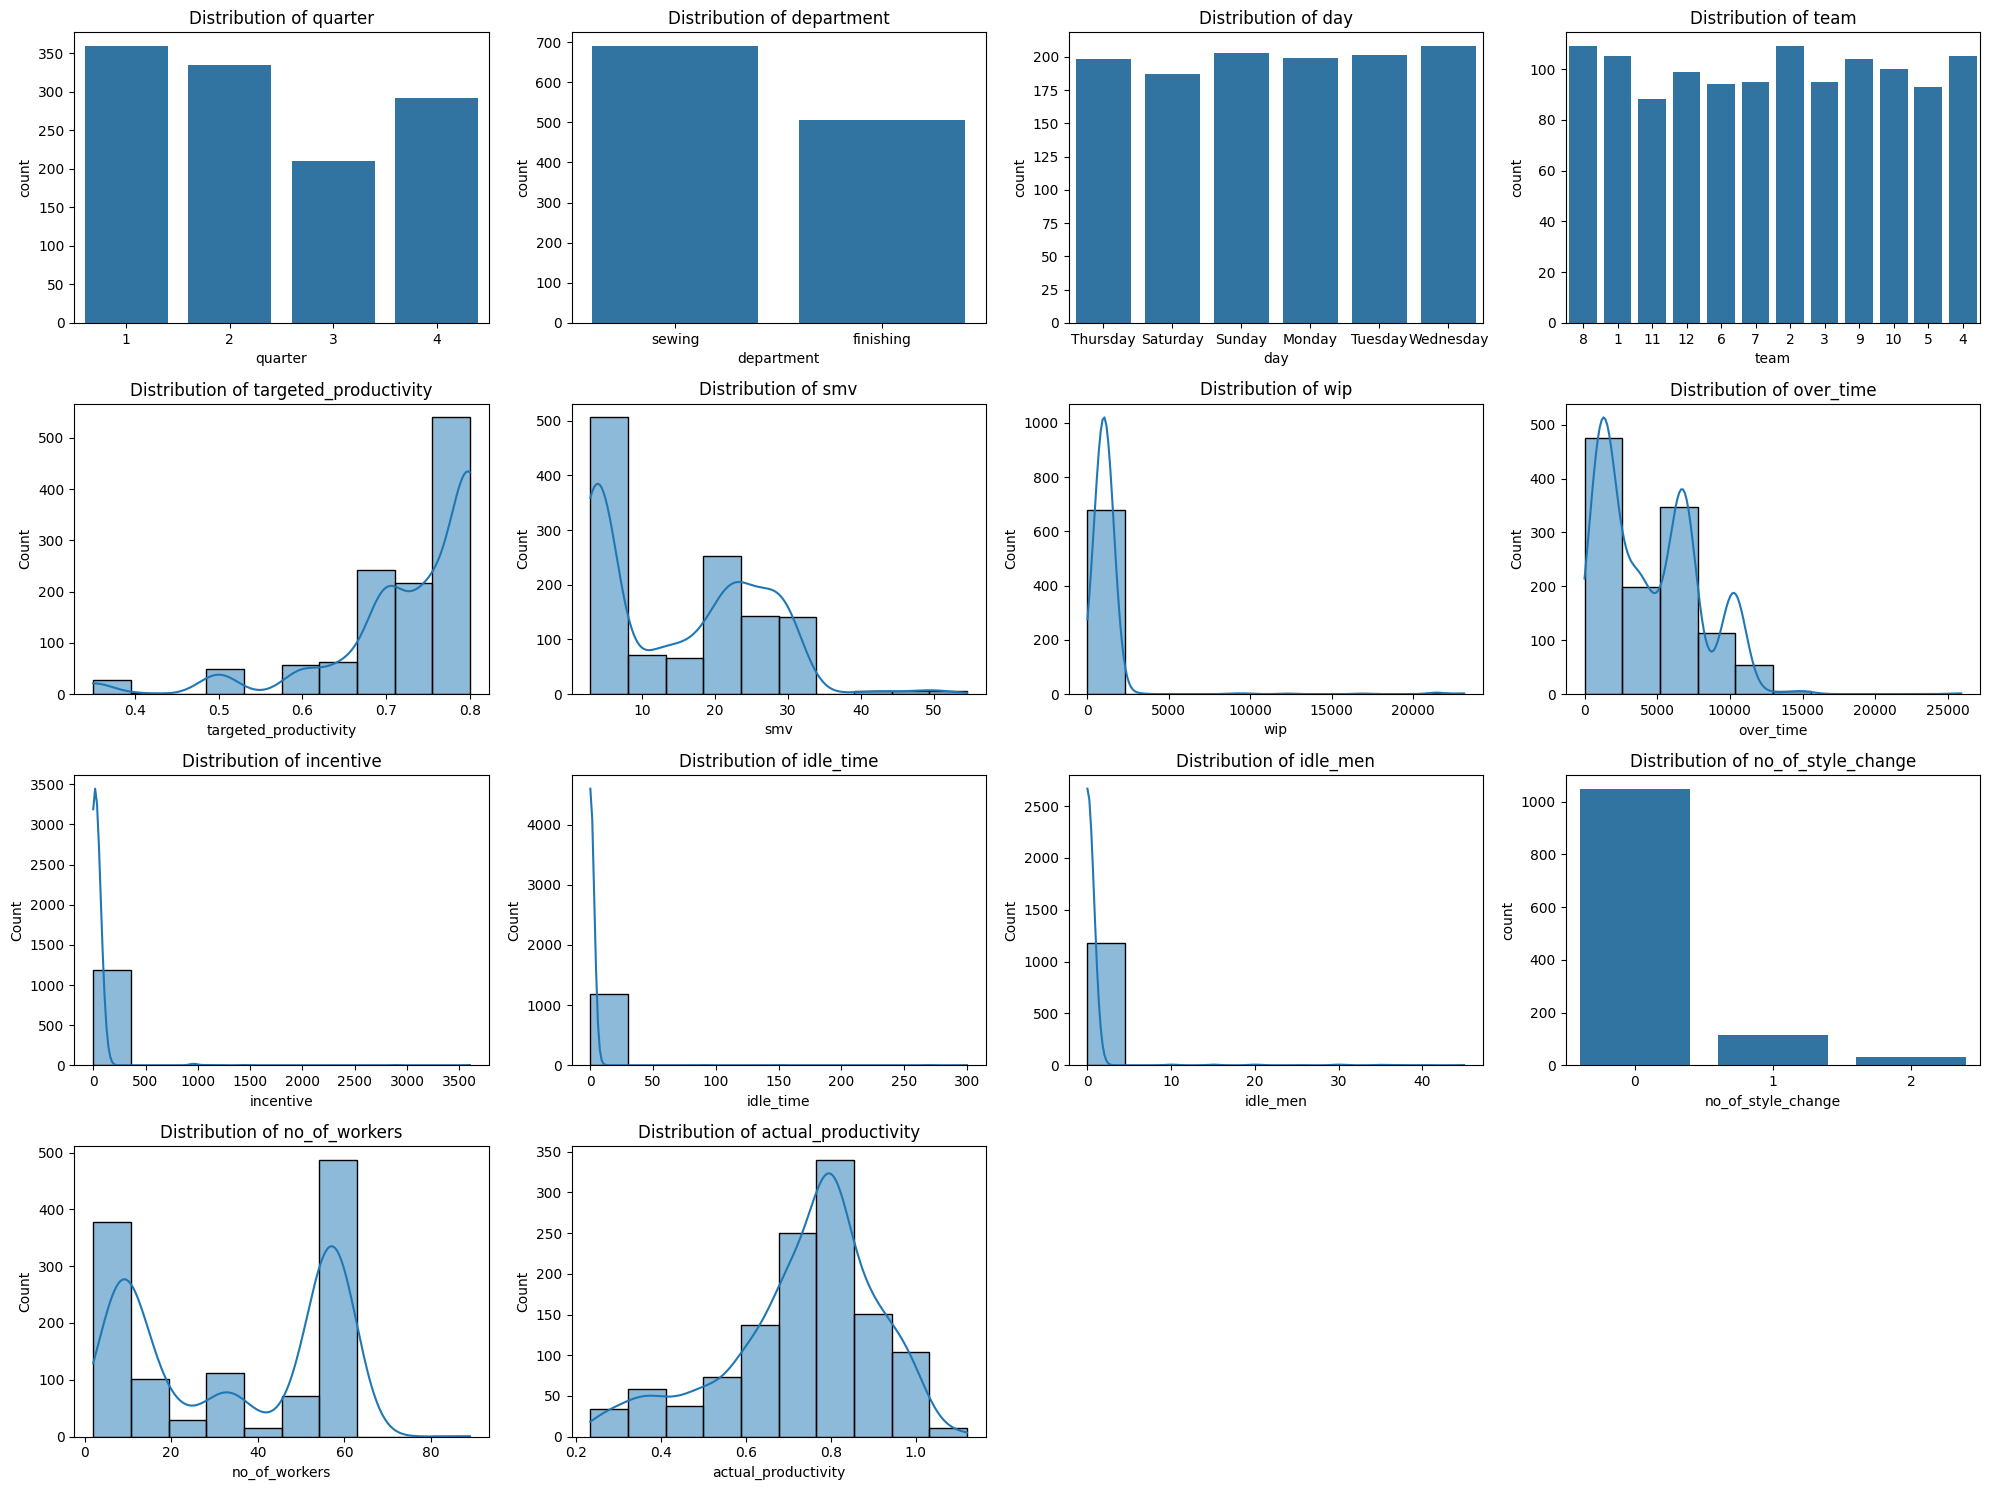

In [43]:
distribution_df = df_clean.drop(["date"], axis = 1)

n_rows = 4
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(distribution_df.columns):
    if distribution_df[col].dtype == 'object' or distribution_df[col].nunique() < 6:  # Check for categorical data
        sns.countplot(data=distribution_df, x=col, ax=axes[i])
    else:
        sns.histplot(data=distribution_df, x=col, ax=axes[i], bins=10, kde=True)

    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

From the results above, we can see a few columns whose distributions indicate that they hold little value or are very uneven. Our goal is to tailor our data for the model we will be building later. To further this purpose in this segment, we will remove all columns that do not provide significant value to our model. The five columns we will remove now are:

* **`wip`**
* **`idle_time`**
* **`idle_men`**
* **`no_of_style_change`**

One more column we will quickly drop before moving on to the next section is the **`date`** column. Contrary to the other columns we are removing, the **`date`** column does not contain any errors, but it simply does not provide enough valuable information for the model we are trying to build.

In [44]:
# Columns to remove
columns_to_drop = ['date', 'wip', 'idle_time', 'idle_men', 'no_of_style_change']

# Dropping the specified columns
df_clean = df_clean.drop(columns=columns_to_drop)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1196 entries, 0 to 1196
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1196 non-null   object 
 1   department             1196 non-null   object 
 2   day                    1196 non-null   object 
 3   team                   1196 non-null   object 
 4   targeted_productivity  1196 non-null   float64
 5   smv                    1196 non-null   float64
 6   over_time              1196 non-null   int64  
 7   incentive              1196 non-null   int64  
 8   no_of_workers          1196 non-null   int64  
 9   actual_productivity    1196 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 102.8+ KB


[Back to Table of Contents](#toc)

#### Outliers<a id="outliers"></a>

Now that we've removed some of the unnecessary columns, we will check the distributions of the remaining numeric columns once more. However, this time we will use a different visualization method called a box plot. We will look for any outlier values in these numeric columns that need to be removed.

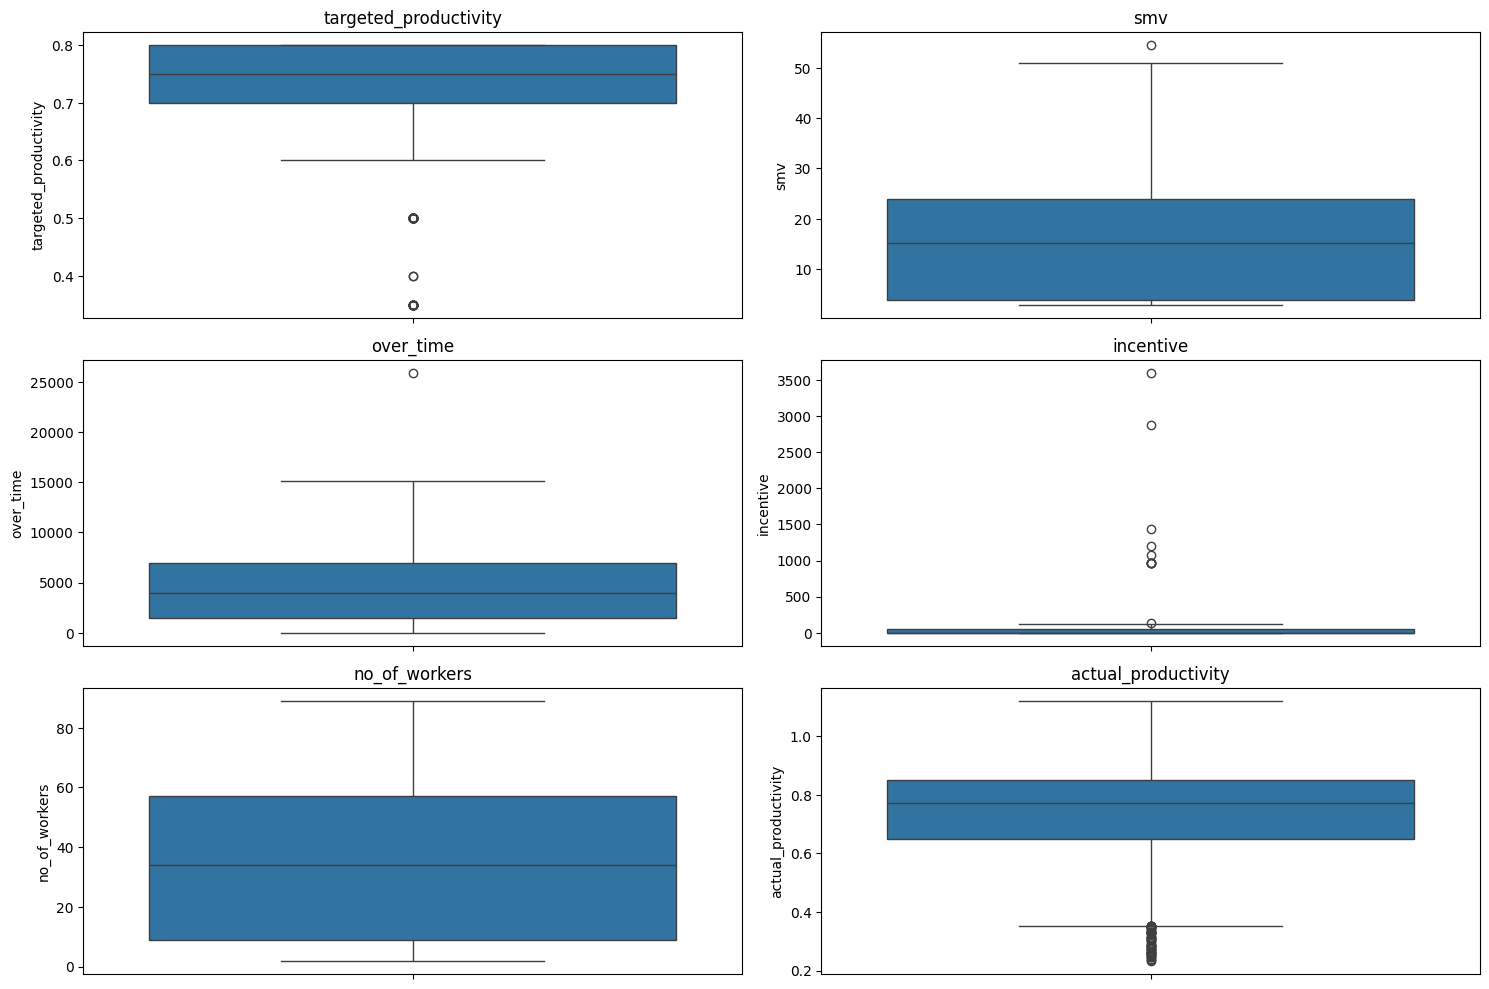

In [45]:
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_df.columns):
    plt.subplot(3, 2, i + 1)  # Adjust the 3, 2 to change the grid shape
    sns.boxplot(y=numeric_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

It is critical to ensure that our data is as clean as possible before building our model. In the box plots above, we can see that there are indeed some outliers in our remaining numeric columns. To make all our columns as clean and uniform as possible, we will remove these outliers by calculating the range between the first and third quartiles and dropping any values that fall outside that range. We've designed a custom function in the code below to accomplish this, and we will apply it to each column that has shown outliers in the results above.

In [46]:
def df_filter(column, dataframe):

    # Calculate Q1 and Q3
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_filtered = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

    return df_filtered

In [47]:
# Filtering the outliers in targeted_productivity
df_clean = df_filter("targeted_productivity", df_clean)

# Filtering the outliers in smv
df_clean = df_filter("smv", df_clean)

# Filtering the outliers in over_time
df_clean = df_filter("over_time", df_clean)

# Filtering the outliers in actual_productivity
df_clean = df_filter("actual_productivity", df_clean)

# Filtering the outliers in incentive
df_clean = df_filter("incentive", df_clean)

In [48]:
df_clean

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sewing,Thursday,8,0.80,26.16,7080,98,59,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.886500
2,1,sewing,Thursday,11,0.80,11.41,3660,50,31,0.800570
3,1,sewing,Thursday,12,0.80,11.41,3660,50,31,0.800570
4,1,sewing,Thursday,6,0.80,25.90,1920,50,56,0.800382
...,...,...,...,...,...,...,...,...,...,...
1191,2,sewing,Wednesday,7,0.65,30.48,6840,26,57,0.650596
1192,2,finishing,Wednesday,10,0.75,2.90,960,0,8,0.628333
1193,2,finishing,Wednesday,8,0.70,3.90,960,0,8,0.625625
1194,2,finishing,Wednesday,7,0.65,3.90,960,0,8,0.625625


[Back to Table of Contents](#toc)

#### Correlations<a id="correlations"></a>

A significant part of building machine learning models is identifying which columns bring the most value and which do not. It often saves our model a lot of trouble if we can remove as much cluttering data as possible. We achieve some of this by simply cleaning up errors, but we also examine the relationships our columns have with the target column. If our data contains columns that bring very little or no correlation value, it may be better to remove them, depending on the circumstances. However, regardless of whether we need to take such action, it's beneficial to understand the kinds of relationships we are dealing with.

As mentioned, we will be looking at the relationships our columns have with the target column. In this dataset, the **`actual_productivity`** column was intended to be the target variable. However, in this project, we plan to build a classification decision tree. This particular machine learning model requires the target variable to be categorical rather than numerical. If we were building a regression tree instead, we could use the **`actual_productivity`** column in its present state. As it stands, we will need to construct a new categorical target variable based on the **`actual_productivity`** column. Our new target variable will contain boolean values categorizing each row, indicating whether it met its target productivity or not. We will create this new target column in the code below.

In [49]:
# Adding productivity_goal_reached column
df_clean["productivity_goal_reached"] = df_clean["actual_productivity"] >= df_clean["targeted_productivity"]
df_clean["productivity_goal_reached"].value_counts()

productivity_goal_reached
True     803
False    233
Name: count, dtype: int64

We can see the count of rows that met their productivity goal versus those that did not. It's clear that the distribution is largely unbalanced, and we will need to keep this in mind when we build our model.

When we calculate our correlation values and construct our model, the columns must be numeric and not of other data types, such as text. Therefore, our first task will be to convert all columns, except for the target column, to numeric. We do not need to convert the target column because it is already in a Boolean data type, and Boolean values are generally treated as **1** (True) and **0** (False) in most programming languages and libraries. 

We will achieve this by transforming our object (non-numeric) type columns into dummy variables. Dummy variables convert the values of object columns into numbers by creating new columns for each unique value in the original column. In these new columns, a **`1`** indicates that the row belongs to that category, while a **`0`** indicates that it does not. This format makes the data easier for a computer to understand and use when building a model.

The columns we will be converting in the code below are:

* **`quarter`**
* **`department`**
* **`day`**
* **`team`**

In [50]:
# Convert the selected columns into dummy variables
quarter_dummies = pd.get_dummies(df_clean['quarter'], prefix='q')
department_dummies = pd.get_dummies(df_clean['department'], prefix='dept')
day_dummies = pd.get_dummies(df_clean['day'])
team_dummies = pd.get_dummies(df_clean['team'], prefix='team')

# Joining the original df and the dummies df
df_clean = pd.concat([df_clean, quarter_dummies], axis=1)
df_clean = pd.concat([df_clean, department_dummies], axis=1)
df_clean = pd.concat([df_clean, day_dummies], axis=1)
df_clean = pd.concat([df_clean, team_dummies], axis=1)

# Drop all the original columns
df_clean = df_clean.drop(columns=['quarter'])
df_clean = df_clean.drop(columns=['department'])
df_clean = df_clean.drop(columns=['day'])
df_clean = df_clean.drop(columns=['team'])

# Convert all boolean columns (dummy variables) to integers (1 or 0)
df_clean[df_clean.select_dtypes(include='bool').columns] = df_clean.select_dtypes(include='bool').astype(int)

# Reverting the target column back to boolean type
df_clean['productivity_goal_reached'] = df_clean['productivity_goal_reached'].astype(bool)

In [51]:
# Reorganizing the columns
new_order = ['targeted_productivity', 'actual_productivity', 'productivity_goal_reached', 'smv', 'dept_finishing', 'dept_sewing', 'q_1', 'q_2', 'q_3', 'q_4', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'team_1', 'team_2', 'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11', 'team_12', 'no_of_workers', 'incentive','over_time']

df_clean = df_clean.reindex(columns=new_order)

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036 entries, 0 to 1195
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   targeted_productivity      1036 non-null   float64
 1   actual_productivity        1036 non-null   float64
 2   productivity_goal_reached  1036 non-null   bool   
 3   smv                        1036 non-null   float64
 4   dept_finishing             1036 non-null   int64  
 5   dept_sewing                1036 non-null   int64  
 6   q_1                        1036 non-null   int64  
 7   q_2                        1036 non-null   int64  
 8   q_3                        1036 non-null   int64  
 9   q_4                        1036 non-null   int64  
 10  Saturday                   1036 non-null   int64  
 11  Sunday                     1036 non-null   int64  
 12  Monday                     1036 non-null   int64  
 13  Tuesday                    1036 non-null   int64  
 1

Our dataframe columns are now all numeric and properly organized. In the code below, we will generate a visualization that will display the columns with the strongest relationships with our target variable.

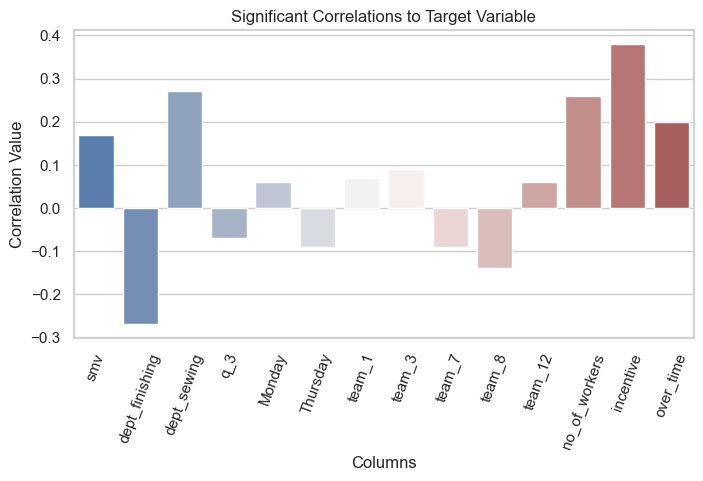

In [53]:
target_variable = 'productivity_goal_reached'

# Calculate and round the correlation values to two decimals
correlation_matrix = df_clean.corr()
correlation_matrix_rounded = correlation_matrix.round(2)

# Extract the target variable's correlations and filter the df correlations to contain those large enough to be significant
target_correlations = correlation_matrix_rounded[[target_variable]]
filtered_corr = target_correlations[(target_correlations[target_variable] > 0.05) | 
                                    (target_correlations[target_variable] < -0.05)]

# Drop the target variable and 'actual_productivity' column from the results
filtered_corr = filtered_corr.drop([target_variable, 'actual_productivity'])

# Prepare the df for plotting
filtered_corr.reset_index(inplace=True)
filtered_corr.columns = ['Column', 'Correlation value']  # Rename the columns for plotting

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))

# Create a bar plot with updated parameters
bar_plot = sns.barplot(x='Column', y='Correlation value', hue='Column', 
                       data=filtered_corr, palette='vlag', legend=False)

plt.xticks(rotation=70)
plt.title('Significant Correlations to Target Variable')
plt.xlabel('Columns')
plt.ylabel('Correlation Value')
plt.show()

Above, we can see the columns that exhibited the most noteworthy correlations to our target column (or variable or feature) **`productivity_goal_reached`**. We notice that several columns stand out, although no column has a correlation value above **0.4** or below **-0.3**. While these are relatively low correlation scores, it is still important to understand the strengths of the relationships in our data. 

Some of the standout columns include the department columns, **`smv`**, **`no_of_workers`**, **`incentive`**, and **`over_time`**. These correlations make sense, as different departments and time spent per project understandably have varying productivity levels. The number of workers in each team, the hours of overtime worked, and the incentive payment amount for each instance all impact how productive a team can be at any given time.

As for the other columns, they provide a good visual representation of the relationship levels with the target variable. Although several columns did not have high enough correlations to be included in the visualization above, we have decided not to remove any of the columns currently in our cleaned dataframe. 

With that, we have now completed our data cleaning and preparation stage and are ready to move on to building our model! Here's a quick final look at what we've accomplished in our cleaning.

In [54]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

In [55]:
print("Before Cleaning:")
df.head(3)

Before Cleaning:


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570


In [56]:
print("After Cleaning:")
df_clean.head(3)

After Cleaning:


,targeted_productivity,actual_productivity,productivity_goal_reached,smv,dept_finishing,dept_sewing,q_1,q_2,q_3,q_4,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,team_1,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_workers,incentive,over_time
0,0.80,0.940725,True,26.16,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,59,98,7080
1,0.75,0.886500,True,3.94,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,8,0,960
2,0.80,0.800570,True,11.41,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,31,50,3660


In [57]:
# Reset column display option to original setting
pd.reset_option('display.max_columns')

[Back to Table of Contents](#toc)

### Model Building<a id="building"></a>

At last, and after much cleaning, we are ready to build our model! As aforementioned, we will be constructing a classification decision tree. Like most other machine learning models, we will begin by separating our target value, **`productivity_goal_reached`**, from the other features and splitting all the data into training and testing sets. We will also ensure that we do not include the **`actual_productivity`** column in our data since our target column is based on it.

Another important point to remember is that our target variable is very unbalanced. As we observed earlier, there are **810** instances where the team met or exceeded their productivity goal and **236** instances where they did not. We will need to account for this imbalance when splitting our data into training and testing sets by using the **`stratify`** parameter in our **`train_test_split`** function. This will ensure that the proportions of teams that met their productivity goals are maintained in both the training and testing data. We will also use the **`shuffle`** parameter in our split to ensure that the selection of rows for each section is completely random.

In [58]:
X = df_clean.drop(['actual_productivity', 'productivity_goal_reached'], axis=1)
y = df_clean['productivity_goal_reached']

X

,targeted_productivity,smv,dept_finishing,dept_sewing,q_1,q_2,q_3,q_4,Saturday,Sunday,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_workers,incentive,over_time
0,0.80,26.16,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,59,98,7080
1,0.75,3.94,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0,960
2,0.80,11.41,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,31,50,3660
3,0.80,11.41,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,31,50,3660
4,0.80,25.90,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,56,50,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,0.65,30.48,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,57,26,6840
1192,0.75,2.90,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,8,0,960
1193,0.70,3.90,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,8,0,960
1194,0.65,3.90,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,8,0,960


In [59]:
y

0        True
1        True
2        True
3        True
4        True
        ...  
1191     True
1192    False
1193    False
1194    False
1195    False
Name: productivity_goal_reached, Length: 1036, dtype: bool

In [60]:
# Splitting our data into testing and training sections
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24, stratify=y)

In [61]:
# Calculate percentages for training set
train_percentage = y_train.value_counts(normalize=True) * 100

# Calculate percentages for testing set
test_percentage = y_test.value_counts(normalize=True) * 100

print("Training Percentages:")
print(train_percentage)
print("\n")
print("Testing Percentages:")
print(test_percentage)

Training Percentages:
productivity_goal_reached
True     77.536232
False    22.463768
Name: proportion, dtype: float64


Testing Percentages:
productivity_goal_reached
True     77.403846
False    22.596154
Name: proportion, dtype: float64


Now it's time to build our model. We will use **GridSearchCV** to test different values for several parameters to hopefully achieve a model with the highest accuracy possible.

In [62]:
class_tree = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}


# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=class_tree, 
                           param_grid=param_grid,
                           scoring='accuracy',         # Metric to evaluate
                           cv=5,                       # Number of cross-validation folds
                           n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                       20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [63]:
# Retrieve the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.8345162468054035


[Back to Table of Contents](#toc)

### Model Metrics and Evaluation<a id="model_eval"></a>

In the result above, we can see the final values for each parameter in our model after several different values were tested multiple times. We can also see that the best score our model received in cross-validation was **83.4%**. So far, the output above suggests that our model is on track to achieve good final accuracy. Let's verify this in the code below by running our model on both the training and testing datasets. We will then examine and compare the accuracy metrics of the model's results.

In [64]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate and print accuracy of train and test
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on train set:", accuracy_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on test set:", accuracy_test)

Accuracy on train set: 0.8599033816425121
Accuracy on test set: 0.8557692307692307


In [65]:
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

print("Training Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Training Confusion Matrix:
[[113  73]
 [ 43 599]]
Training Confusion Matrix:
[[ 28  19]
 [ 11 150]]


In [66]:
print("Model Classification Report on the Training data:")
print(classification_report(y_train, y_pred_train))

Model Classification Report on the Training data:
              precision    recall  f1-score   support

       False       0.72      0.61      0.66       186
        True       0.89      0.93      0.91       642

    accuracy                           0.86       828
   macro avg       0.81      0.77      0.79       828
weighted avg       0.85      0.86      0.86       828



In [67]:
print("Model Classification Report on the Testing data:")
print(classification_report(y_test, y_pred_test))

Model Classification Report on the Testing data:
              precision    recall  f1-score   support

       False       0.72      0.60      0.65        47
        True       0.89      0.93      0.91       161

    accuracy                           0.86       208
   macro avg       0.80      0.76      0.78       208
weighted avg       0.85      0.86      0.85       208



Not only do the scores above show that our model performed well on the training data, but they also indicate that it is just as effective on the testing data! We are very pleased with our rounded accuracy score of **86%** on both datasets. While this is a positive outcome, we cannot rely solely on the accuracy metric. This is why we've also printed the **`confusion_matrix`** and **`classification_report`** in the code above; they may reveal aspects of our model that the accuracy value does not. There might be areas where our model is not performing well, which require attention. Once we learn more about our model through these metrics, we could potentially address its weak points and improve its accuracy even further.

Before we evaluate the actual metric values, let's first discuss the structure and meanings of the metrics themselves. We'll start by examining the **`confusion_matrix`**. We can see that it has four values: two in the top row and two in the bottom row. The **`confusion_matrix`** can be visualized as follows:

<img src="confusion_matrix.png" alt="confusion_matrix" width="600"/>
<small>From Google Images</small>

This metric shows the numbers of correct and incorrect predictions our model made. **True positives** occur when the model predicts that a team met or exceeded their productivity goal, and the model is correct. **False positives** happen when the model predicts that a team met or exceeded their productivity goal, but the model is incorrect. The same applies to **true negatives** and **false negatives**. For example, the numbers from our model on the testing data's **`confusion_matrix`** show **28** true positives, **11** false positives, **150** true negatives, and **19** false negatives. In both true and false predictions, the number of correct predictions was greater than the number of incorrect predictions. This indicates that this metric aligns with the accuracy score so far.

Next, let's look at the **`classification_report`**. This metric contains many more categories than the **`confusion_matrix`**. Each number in the report comes from a specific calculation, and many are tied to the numbers in the **`confusion_matrix`** that we just examined. Before we dive into the calculations, however, let's consider the structure of the report itself. The first two rows, **`False`** and **`True`**, represent the two unique values or classes in our target variable. The four column titles—**`precision`**, **`recall`**, **`f1-score`**, and **`support`**—represent different calculations based on the numbers of true and false positive and negative predictions the model made for each class. Below these two class rows is the **`accuracy`** row, which contains the rounded accuracy value we previously observed. Further down, under the **`accuracy`** row, we see the two rows labeled **`macro avg`** and **`weighted avg`**. These two rows provide averages of the **`precision`**, **`recall`**, **`f1-score`**, and **`support`** calculations above them. The **`macro avg`** takes a simple average, while the **`weighted avg`** adjusts the average based on the size of each class (**`True`** and **`False`**). All of this will likely become clearer as we move on to examine each individual calculation next.

We will first look at the **`precision`** calculation. It is mathematically represented as follows:

![precision formula](precision_formula.png "precision formula")

For reference, **`TP`** stands for **'True Positive'**, **`FP`** stands for **'False Positive'**, and so on. In written terms, the **`precision`** function calculates the ratio of the total number of correctly predicted positives. In other words, it represents the ratio of the number of times **"True"** was predicted correctly to how many times the model predicted the answer as **"True"**, regardless of whether the actual answer matched the model's answer. The same applies to the **`False`** class.

The next equation we’re going to examine is the **`recall`** calculation.

![recall formula](recall_formula.png "recall formula")

The definition for this mathematical statement is very similar to the **`precision`** definition. The **`recall`** formula represents the number of times the model correctly predicted a team as having been productive, relative to the total number of instances where a team met or exceeded its productivity. The numerator (true positive) in both **`precision`** and **`recall`** is the same, but it is the denominator that differentiates them. The **`precision`** denominator represents the number of times the model predicted productivity as a certain class, while the **`recall`** denominator indicates the number of times the specific class actually occurred.

Next to the **`recall`** values are the **`f1-score`** values. This calculation in mathematical terms can be expressed as follows:

![f1 score formula](f1_score_formula.png "f1 score formula")

This equation can be described in written terms as a calculation that combines both the **`precision`** and **`recall`** values. This combination is called a harmonic mean and is very valuable, as it can provide a more straightforward measure if either the **`precision`** or **`recall`** values are unbalanced. It helps give us an even clearer picture of how our model is really performing. The closer our **`f1-score`** value is to **1.0**, the more balanced and ideal our **`precision`** and **`recall`** values are, and the greater confidence we can have in them.

Lastly, in the fourth vertical column, we have the **`support`** column. Unlike the previous three columns that involve calculations, this one does not. It simply counts the values in each class in the first two rows and the total count of all values in the last three rows. In the case of our testing dataset, we have **47** **`False`** values, **161** **`True`** values, and **208** values altogether.

Now, moving on to the lower three calculations located in the rows beneath the two class rows, we have the **`accuracy`** row. The accuracy formula is as follows:

![accuracy formula](accuracy_formula.png "accuracy formula")

The **`accuracy`** metric is probably one of the easiest to understand, as it is simply the percentage of values that the model correctly predicted.

Below the **`accuracy`** row, there are two rows that perform similar calculations, each with one key difference. Both the **`macro average`** and **`weighted average`** rows calculate the average of the **`precision`**, **`recall`**, and **`f1-score`** values above them. The difference lies in how much weight is given to each class in the average calculation. Remember that our classes (True and False) differ significantly in size; there are many more **`True`** values than **`False`** values. 

The **`macro average`** row calculates the averages of the **`precision`**, **`recall`**, and **`f1-score`** values, giving each class equal weight—or treating both classes equally. The **`weighted average`** row, on the other hand, calculates the averages while giving each class an appropriate weight. In other words, the **`weighted average`** row compensates for situations where the class sizes vary widely. This can be seen in the formula representation below:

![macro average formula formula](macro_average_formula.png "macro average formula formula")

![weighted average formula](weighted_average_formula.png "weighted average formula")

In the formulas above, we can see how the **`weighted average`** takes the size of each class into consideration in the average by using the **`support`** variable. As we previously observed, the **`support`** variable stands for the number of occurrences in that particular class.

Now that we know what each of the metrics are telling us, we can interpret how our model is performing! Let's print the **`classification_report`** once again, for both the training and testing datasets, as shown in the code below, for close examination.

In [68]:
print("Model Classification Report on the Training data:")
print(classification_report(y_train, y_pred_train))

Model Classification Report on the Training data:
              precision    recall  f1-score   support

       False       0.72      0.61      0.66       186
        True       0.89      0.93      0.91       642

    accuracy                           0.86       828
   macro avg       0.81      0.77      0.79       828
weighted avg       0.85      0.86      0.86       828



In [69]:
print("Model Classification Report on the Testing data:")
print(classification_report(y_test, y_pred_test))

Model Classification Report on the Testing data:
              precision    recall  f1-score   support

       False       0.72      0.60      0.65        47
        True       0.89      0.93      0.91       161

    accuracy                           0.86       208
   macro avg       0.80      0.76      0.78       208
weighted avg       0.85      0.86      0.85       208



As we examine the class rows (the first two rows), we can see that all the metric values for the **`False`** class are lower than those for the **`True`** class. This may be explained by the significantly smaller number of occurrences in the **`False`** class compared to the **`True`** class. However, none of the **`False`** metrics are excessively low in either the training or testing reports, and thus do not raise much concern. Furthermore, the **`True`** class metrics are quite impressive, reaching as high as **0.93**!

We are reassured to see that the average and f1-score values are also exceptional, as the macro and weighted averages reflect the averages of each metric between both classes. The f1-score values are a combination of the **`precision`** and **`recall`** metrics per class. As we noted earlier, our accuracy stands at **86%**, which is supported by the equally positive **`precision`**, **`recall`**, **`f1-score`**, and average values. 

The more we compare the classification reports of the training and testing datasets, the more we notice their similarity. The main difference is the larger data size in the training dataset compared to the testing dataset; however, this has not significantly affected the metric values, with only minor differences observed. This information is very useful for evaluating our model.

[Back to Table of Contents](#toc)

### Decision Tree Flow Diagram<a id="diagram"></a>

Confident that our model is performing well, we will now examine the visual aspects of the model using a classification decision tree flow diagram.

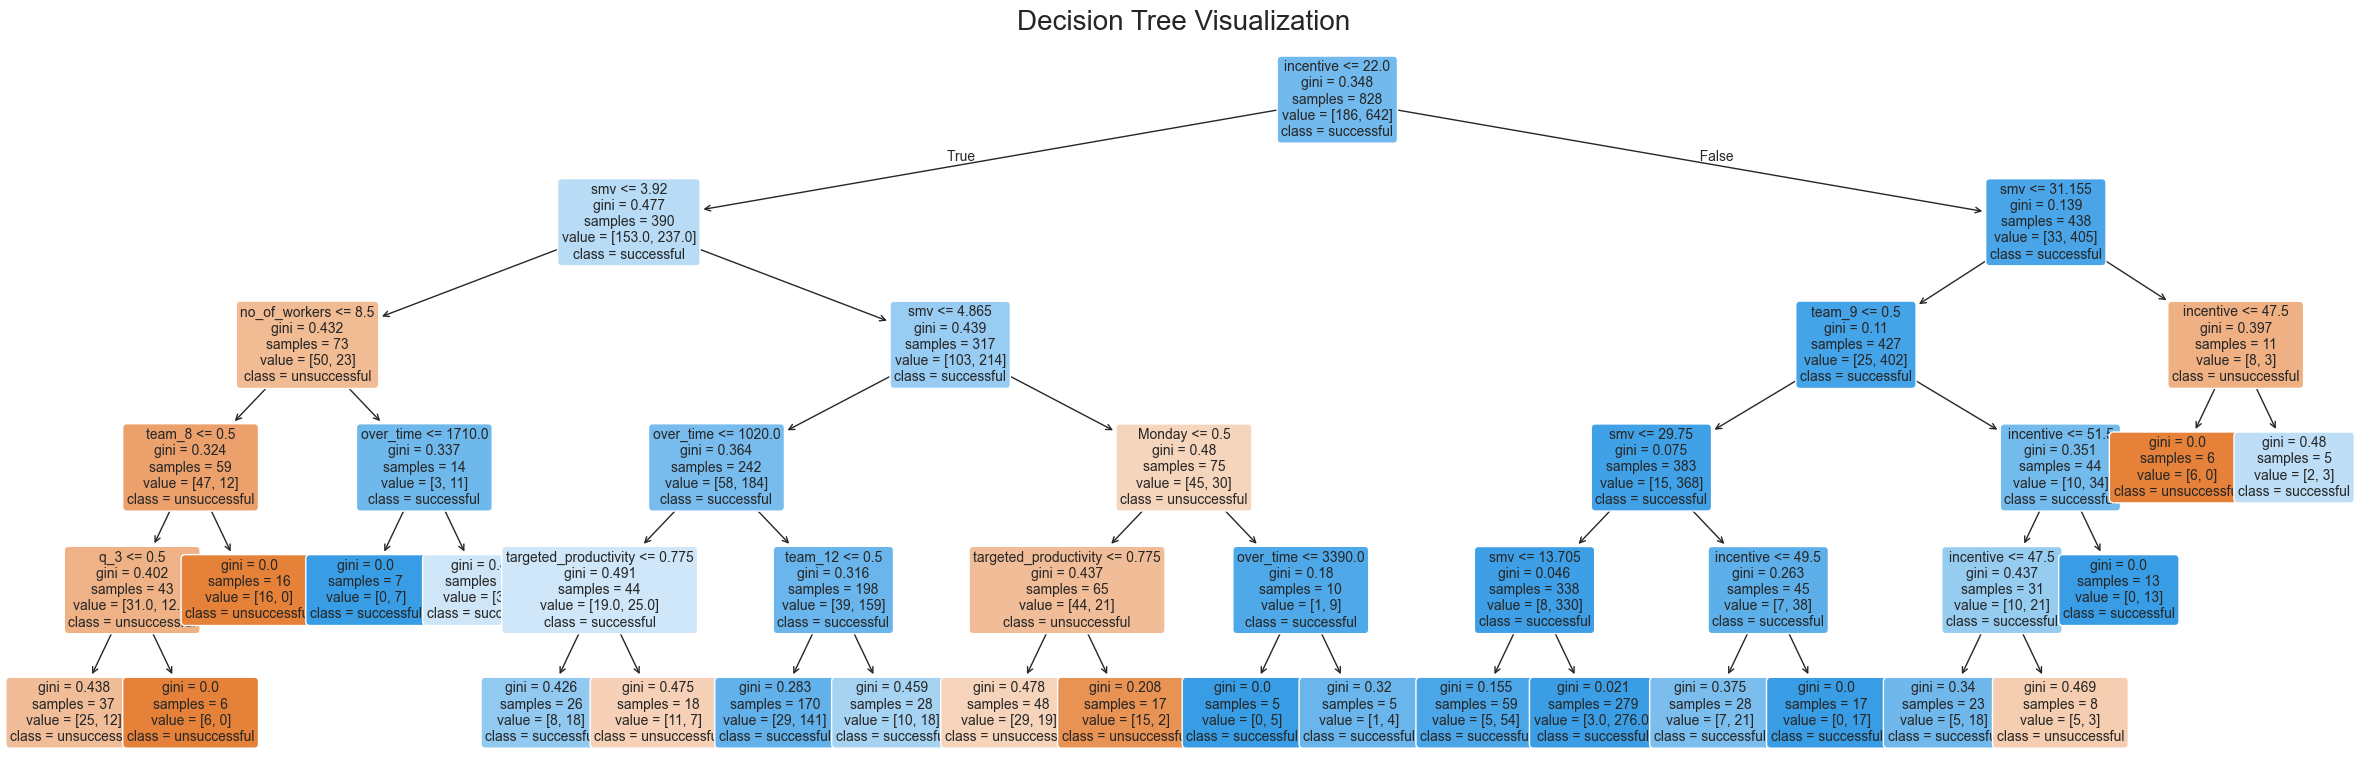

In [70]:
plt.figure(figsize = [24.0, 8.0])

_ = plot_tree(best_model, 
               feature_names=X.columns, 
               class_names=["unsuccessful", "successful"],
               filled=True,       
               proportion=False,
               rounded=True,
               fontsize=10        
              )

plt.title("Decision Tree Visualization", fontsize=20)
plt.tight_layout()
plt.show()

In our tree visualization above, we can trace the path that our model takes to predict its values. Each box is called a node. Arrows pointing to the left indicate the path values take if they meet the condition in that node, while arrows pointing to the right show the path if they do not meet the condition. The node condition is represented by the first row of values in each node. The condition row first shows the feature in question and then the conditions it is being tested against. The **`gini`** value represents the confidence that a value will be categorized correctly in that node, also referred to as the node's purity. This value is based on the number of instances it has to categorize and how many belong to each class. If all the instances that pass through a single node belong to one class, the gini will equal **0**, indicating a perfect purity score.

The **`samples`** row shows how many values pass through a single node. The **`value`** row displays how many of those values belong to each class—the number of values belonging to the **`False`** class is indicated on the left, and the **`True`** class on the right. Lastly, the final row, **`class`**, shows the conclusion of which class each node belongs to in the end. This is determined by which class has more occurrences among the values that passed through each specific node. For example, if there are more **`True`** values than **`False`** values, the node values would be classified as **`successful`** in achieving or surpassing its target productivity value.

As for the more specific details of our tree, here are a few observations:

* The root node (first node) splits the dataset on the **`incentive`** feature.
* The fact that the root node was **`successful`** indicates that the incentive did have a significant impact on productivity.
* The second-level nodes are also both **`successful`**, showing that the **`smv`** feature also influenced productivity.
* We observe several **`successful`** nodes with relatively good **`gini`** scores that utilize the **`over_time`** feature, highlighting its impact on productivity.
* In the left subtree (the tree on the left of the root node), we see that teams with 8.5 workers or fewer were not very productive.
* The majority of our final nodes are **`successful`**, which aligns with our previous metric observations.

All these are important takeaways for this garment factory. This visualization helps us recognize where things are going well in meeting productivity goals and where they are not. This information might prompt company managers to re-staff teams, offer more incentives, adjust the various types of projects each team is assigned, or better reward overtime work.

[Back to Table of Contents](#toc)

### Final Evaluation<a id="final_eval"></a>

In the previous couple of sections of this project, you may have noticed that we are conducting quite a thorough examination of our model. This is because decision trees are very prone to overfitting the data. Overfitting means that the model has become too complex, getting caught up in the tiny details of the training data instead of learning the overall predictive patterns. When overfitting occurs, it leads to high accuracy on the training data but shockingly low accuracy when it comes to unseen testing data. Another way to explain overfitting is that the model has essentially memorized the training data rather than learning how to make accurate predictions; when tested with new data it hasn't seen before, it falls short.

Because of this, it is well worth taking the extra time to examine even the farthest corners of our model. We want to ensure that there are no indicators of overfitting present. That being said, for this last section, we will conduct a final examination to confirm that our model is free of overfitting.

We will do this by using the Random Forest algorithm. This algorithm runs multiple test models to find the best possible model arrangement. Similar to how we used **`GridSearchCV`** to find the best parameter values for our model, we will use the Random Forest algorithm to double-check our model. If the model accuracy that Random Forest produces is greater than our current accuracy, we can adjust our model accordingly. Our goals in using this algorithm are to (1) ensure that our model is not overfitting and (2) achieve the best possible version of our model. Let's run the Random Forest algorithm on our data below.

In [71]:
# Initialize base model with OOB scoring enabled
rf = RandomForestClassifier(random_state=42, oob_score=True, bootstrap=True)

# Define hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 5, 10, 20, 30, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Set up RandomizedSearchCV to test and find the best value for each parameter in param_dist
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the search to the training data
random_search.fit(X_train, y_train)

# Display best parameters and performance
print("Best Parameters Found:")
print(random_search.best_params_)
print("\nBest Cross-Validation Score:")
print(random_search.best_score_)

# Evaluate on test data and show OOB score
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\n Random Forest Classification Report on the Testing data:")
print(classification_report(y_test, y_pred))
print(f"\nOut-of-Bag (OOB) Score: {best_rf.oob_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters Found:
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 18, 'n_estimators': 491}

Best Cross-Validation Score:
0.8321139101861993

Test Accuracy: 0.8317307692307693

 Random Forest Classification Report on the Testing data:
              precision    recall  f1-score   support

       False       0.66      0.53      0.59        47
        True       0.87      0.92      0.89       161

    accuracy                           0.83       208
   macro avg       0.76      0.73      0.74       208
weighted avg       0.82      0.83      0.83       208


Out-of-Bag (OOB) Score: 0.8394


In [72]:
# Printing the classification report for our model once again, for comparison with the random forest model
print("Model Classification Report on the Testing data:")
print(classification_report(y_test, y_pred_test))

Model Classification Report on the Testing data:
              precision    recall  f1-score   support

       False       0.72      0.60      0.65        47
        True       0.89      0.93      0.91       161

    accuracy                           0.86       208
   macro avg       0.80      0.76      0.78       208
weighted avg       0.85      0.86      0.85       208



Above, we can see several different evaluation metrics for the Random Forest model. We can observe the parameters and parameter values that the algorithm selected, the best cross-validation score, the test accuracy value, the test data classification report, and the OOB score. We've already defined all these metrics except for one new addition, the OOB or Out of Bag score. We used this metric specifically for this model because it shows the accuracy score of the Random Forest model when the selection of input data is as random as possible. In other words, it provides the most honest accuracy score, leaving little room for overfitting or other model imperfections. All of these metrics help us compare the algorithm model to our own. You'll notice that we also printed out the classification report for our model on the test data, so we can compare the two models side by side.

As we examine the results of our Random Forest algorithm above, we see that the metric values for the Random Forest model are all lower than those for the testing data of our model. However, they are not low enough to cause any concern; in fact, they never differ by more than **0.10**. This indicates that the Random Forest algorithm did not find any other model configuration that performed better than what we already had.

As we just mentioned, the OOB score and all the other metrics of our Random Forest model were lower than those of our model. Although there is a difference between our models, it is not significant enough to indicate any overfitting. Even if there were a very unusual instance of data input into our model that pushed the accuracy score down to match the OOB score, our model would still be considered acceptable. Furthermore, when we remember that the test accuracy and training accuracy of our model were almost exactly the same, we can confidently conclude that we need not worry about overfitting in our model.

[Back to Table of Contents](#toc)

### Conclusion<a id="conclusion"></a>

In this project, we demonstrated the process of building a successful classification decision tree machine learning model. From data cleaning and examination to model training and finally to model evaluation, we were able to build a model with an accuracy of **86%**. After our cleaning process, we ended up using **29 columns** of data in our model, many of which were boolean. We selected our parameters using **`GridSearchCV`**. To examine our model, we utilized several metrics, such as **`precision`**, **`recall`**, and **`f1-score`**. Lastly, we validated our model by comparing it against a Random Forest model.

This project exemplified how useful decision tree models can be in business management and decision-making, and they can be applied to much more! In the case of the garment factory we studied, the results of this model could prompt the business directors to reevaluate factors such as incentive amounts, overtime payments, or methods of constructing teams. Predictive models truly can have a significant impact on business stewardship, decisions, and ultimately success.